<a href="https://colab.research.google.com/github/Somesh2827/Sales-Data-Analysis-and-Reporting-for-a-Retail-Chain/blob/main/Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
txrn = pd.read_csv('Retail_Data_Transactions.csv')
txrn


,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [ ]:
response = pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [ ]:
df = txrn.merge(response, on='customer_id', how= 'left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [ ]:
df.dtypes
df.shape
df.head()
df.tail()


,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [ ]:

df.describe()


,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  125000 non-null  object 
 1   trans_date   125000 non-null  object 
 2   tran_amount  125000 non-null  int64  
 3   response     124969 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB


In [ ]:

df.shape

(125000, 4)

In [ ]:
pd.isnull(df)

,customer_id,trans_date,tran_amount,response
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
124995,False,False,False,False
124996,False,False,False,False
124997,False,False,False,False
124998,False,False,False,False


In [ ]:
df.isnull().sum()

,0
customer_id,0
trans_date,0
tran_amount,0
response,31


In [ ]:
df.dtypes

,0
customer_id,object
trans_date,object
tran_amount,int64
response,float64


In [ ]:
df.columns

Index(['customer_id', 'trans_date', 'tran_amount', 'response'], dtype='object')

In [ ]:
df[[ 'response', 'tran_amount']].describe()


,response,tran_amount
count,124969.000000,125000.000000
mean,0.110763,64.991912
std,0.313840,22.860006
min,0.000000,10.000000
25%,0.000000,47.000000
50%,0.000000,65.000000
75%,0.000000,83.000000
max,1.000000,105.000000


In [ ]:
df = df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [ ]:
df['trans_date']= pd.to_datetime(df['trans_date'])
df['response']= df['response'].astype('int64')

<ipython-input-20-a558ad5ddeb3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']= pd.to_datetime(df['trans_date'])
<ipython-input-20-a558ad5ddeb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']= pd.to_datetime(df['trans_date'])
<ipython-input-20-a558ad5ddeb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response']= df['respons

In [ ]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [ ]:
set(df['response'])

{0, 1}

In [ ]:
df.dtypes

,0
customer_id,object
trans_date,datetime64[ns]
tran_amount,int64
response,int64


In [ ]:
df['tran_amount'].std()

22.860058562401992

In [ ]:
df['tran_amount'].sum()

8122378

In [ ]:
df['tran_amount'].mean()


64.99514279541326

In [ ]:
from scipy import stats
import numpy as np

#calc z score
z_scores = np.abs(stats.zscore(df['tran_amount']))

#set a threshold

threshold = 3

outliers= z_scores>threshold

print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [ ]:
from scipy import stats
import numpy as np

#calc z score
z_scores = np.abs(stats.zscore(df['response']))

#set a threshold

threshold = 3

outliers= z_scores>threshold

print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


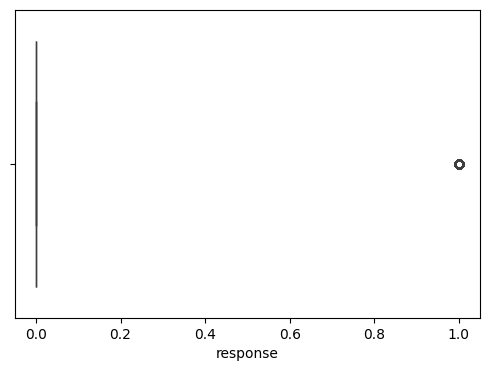

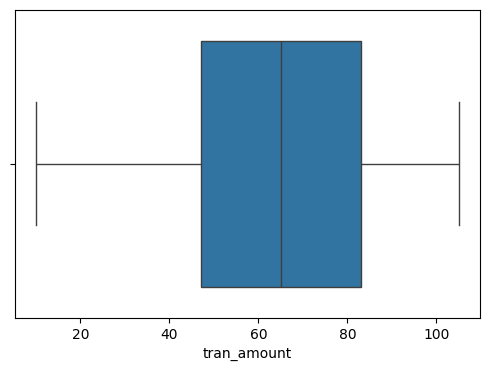

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['response'])
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['tran_amount'])
plt.show()

In [ ]:
df['month'] = df['trans_date'].dt.month
df

<ipython-input-30-d20db75ac83f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [ ]:
daily_sales = df.groupby(['customer_id', 'trans_date'])['tran_amount'].sum().reset_index()
daily_salesdaily_sales = df.groupby(['customer_id', 'trans_date'])['tran_amount'].sum().reset_index()
daily_sales

,customer_id,trans_date,tran_amount
0,CS1112,2011-06-15,56
1,CS1112,2011-08-19,96
2,CS1112,2011-10-02,60
3,CS1112,2012-04-08,56
4,CS1112,2012-06-24,52
...,...,...,...
124172,CS9000,2014-01-12,16
124173,CS9000,2014-05-08,20
124174,CS9000,2014-07-08,26
124175,CS9000,2014-08-24,35


In [ ]:
weekly_sales = df.set_index('trans_date').resample('W')['tran_amount'].sum().reset_index()
weekly_sales

,trans_date,tran_amount
0,2011-05-22,40319
1,2011-05-29,45925
2,2011-06-05,43315
3,2011-06-12,40455
4,2011-06-19,37942
...,...,...
196,2015-02-22,42779
197,2015-03-01,39998
198,2015-03-08,43725
199,2015-03-15,39698


In [ ]:
monthly_sales = df.groupby('month')['tran_amount'].sum()
monthly_sales = monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [ ]:
customer_counts = df['customer_id'].value_counts().reset_index()
customer_counts.columns= ['customer_id','counts']
customer_counts

#top 5 customers
top_5_cust = customer_counts.sort_values(by='counts', ascending = False).head(5)
top_5_cust

,customer_id,counts
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='counts'>

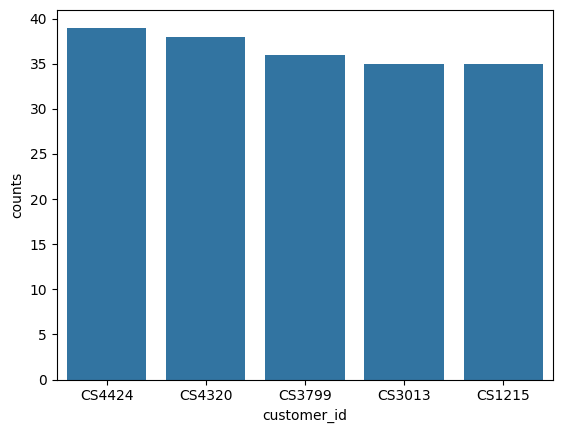

In [ ]:
sns.barplot(x='customer_id', y='counts',data=top_5_cust)

In [ ]:

customer_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

#top 5 customers

top_5_sal = customer_sales.sort_values(by='tran_amount', ascending = False).head(5)
top_5_sal

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


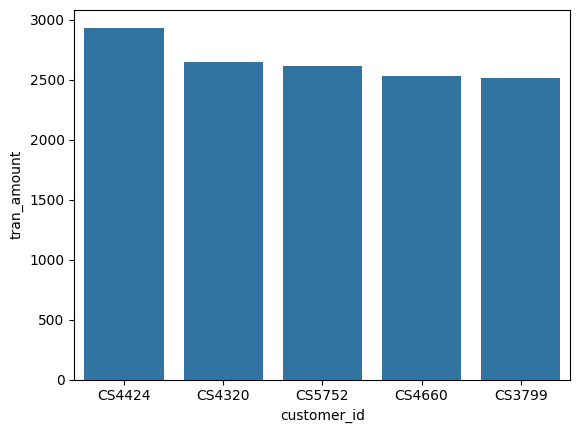

<Figure size 700x100 with 0 Axes>

In [ ]:
sns.barplot(x='customer_id', y='tran_amount', data= top_5_sal)
plt.figure(figsize=(7,1))
plt.show()

** Data Analysis**
Advanced Analytics
Time Series Analysis


<ipython-input-40-e53d293f9350>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']= df['trans_date'].dt.to_period('M')


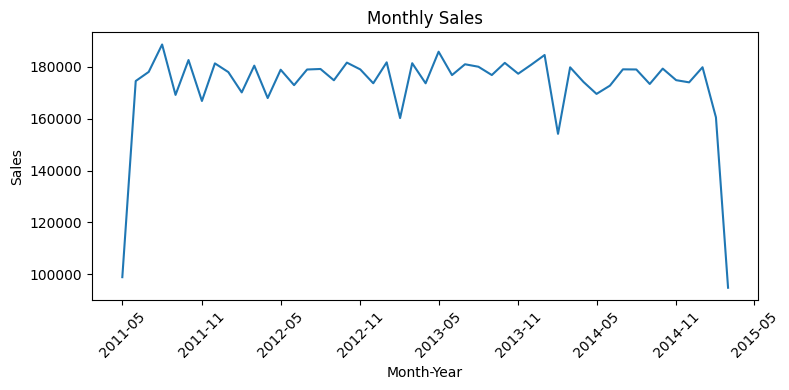

In [ ]:
import matplotlib.dates as mdates

df['month_year']= df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index= monthly_sales.index.to_timestamp()

plt.figure(figsize=(8,4))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title("Monthly Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


**Cohort Segmentation**

In [ ]:
recency = df.groupby('customer_id')['trans_date'].max()
recency

# Sorted the data by customer_id and trans_date
data_sorted = df.sort_values(['customer_id', 'trans_date'])
data_sorted

## Calculate recency for each customer
data_sorted['recency'] = data_sorted.groupby('customer_id')['trans_date'].diff().dt.days
data_sorted

#frequncy
frequncy = df.groupby('customer_id')['trans_date'].count()
frequncy

#Monetary (CMV)
monetary = df.groupby('customer_id')['tran_amount'].sum()
monetary

#combine
rfm= pd.DataFrame({'recency':recency,'frequency':frequncy,'monetary':monetary})
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [ ]:

def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
        return 'P1'
    else:
        return 'P2'
rfm['Segment']= rfm.apply(segment_customer, axis=1)

In [ ]:
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


In [ ]:
set(rfm['Segment'])

{'P0', 'P2'}

**Churn Analysis**

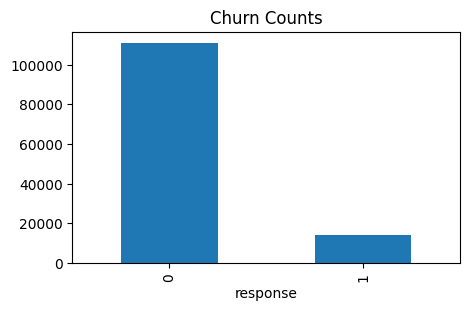

In [ ]:
# Set the size of the plot
plt.figure(figsize=(5, 3))

#Count the numbers of churned and active customers
churn_counts = df['response'].value_counts()

#Plot
churn_counts.plot(kind='bar')
plt.xlabel('response')
plt.title('Churn Counts')
# Show the plot
plt.show()

**Analyzing Top Customers**

<Axes: xlabel='month_year'>

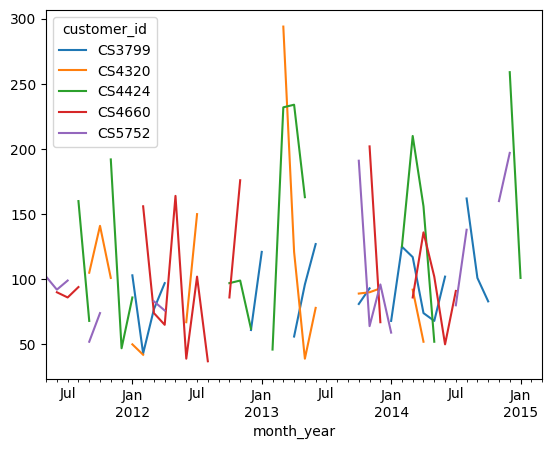

In [ ]:
# Top 5 customers
top_5_customers = monetary.sort_values(ascending=False).head(5).index

# Filter transactions of top 5 customers
top_customers_df = df[df['customer_id'].isin(top_5_customers)]

# Plot their monthly sales
top_customers_sales = top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customers_sales.plot(kind='line')

array([[<Axes: title={'center': 'trans_date'}>,
        <Axes: title={'center': 'tran_amount'}>],
       [<Axes: title={'center': 'response'}>,
        <Axes: title={'center': 'month'}>]], dtype=object)

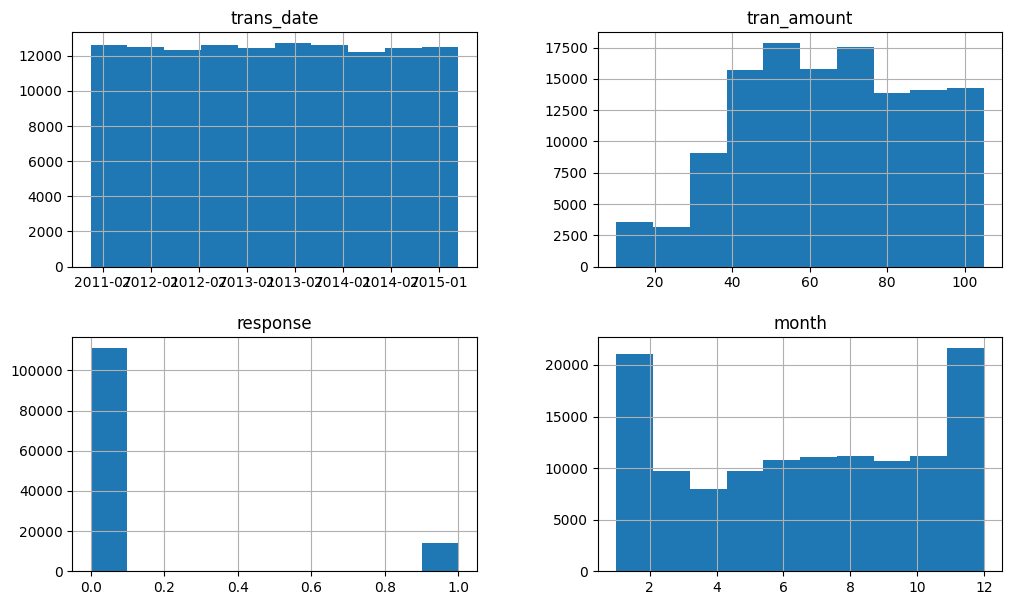

In [ ]:
#Analysis using hist plot

import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(12,7))

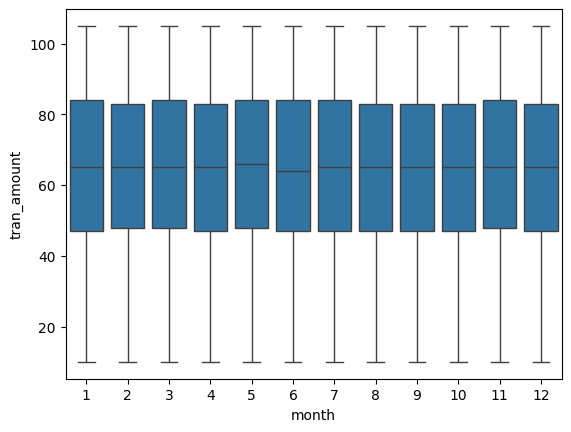

<Figure size 300x100 with 0 Axes>

In [ ]:
import seaborn as sns

sns.boxplot(x="month", y="tran_amount", data=df)
plt.figure(figsize=(3, 1))
plt.show()

In [ ]:
#Monthly Response
pd.crosstab(df['month'],df['response'])

response,0,1
month,,
1,9951,1193
2,8953,984
3,8695,1056
4,7012,961
5,8589,1099
6,9548,1208
7,9795,1238
8,9878,1317
9,9457,1228


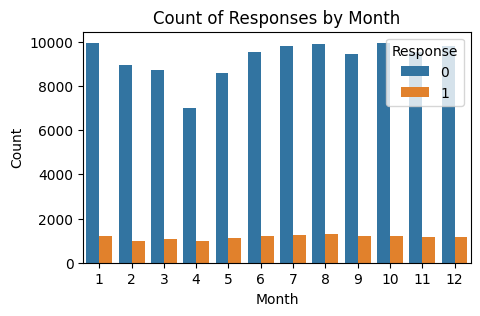

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(x="month", hue="response", data=df)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Count of Responses by Month")
plt.legend(title="Response", loc="upper right")
plt.show()

<Figure size 100x200 with 0 Axes>

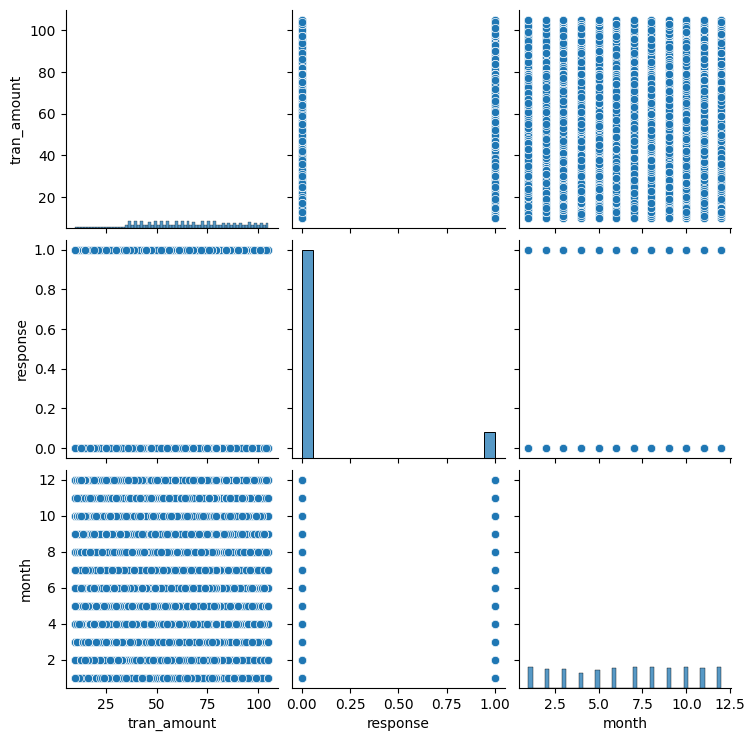

In [ ]:
plt.figure(figsize=(1, 2))
sns.pairplot(df)

<ipython-input-55-3461ff8af52c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tran_amount'])


<Axes: title={'center': 'Transaction amount by density'}, xlabel='tran_amount', ylabel='Density'>

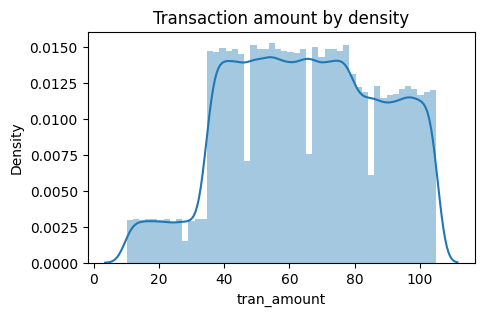

In [ ]:
plt.figure(figsize=(5, 3))
plt.title("Transaction amount by density")
sns.distplot(df['tran_amount'])

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

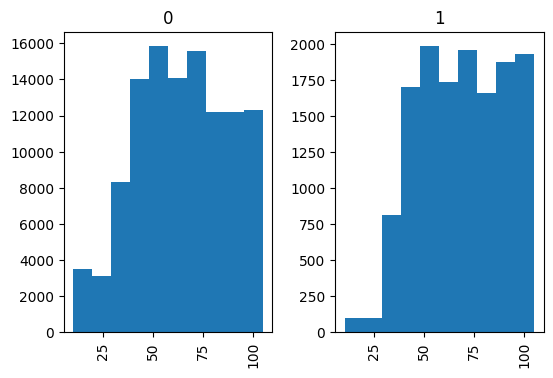

In [ ]:
df.hist(by='response',column = 'tran_amount',figsize=(6,4))

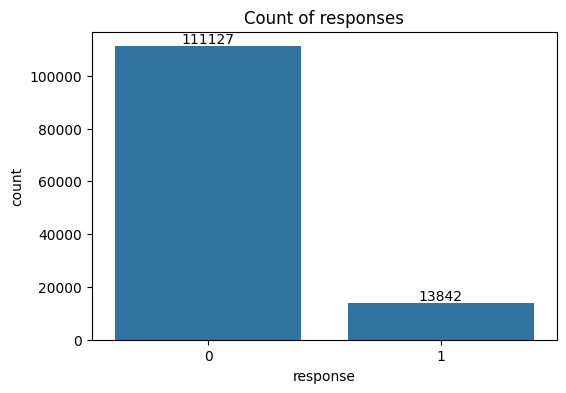

In [ ]:
# plotting a bar chart for Gender and it's count
plt.figure(figsize=(6, 4))
plt.title("Count of responses")
ax = sns.countplot(x ='response', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

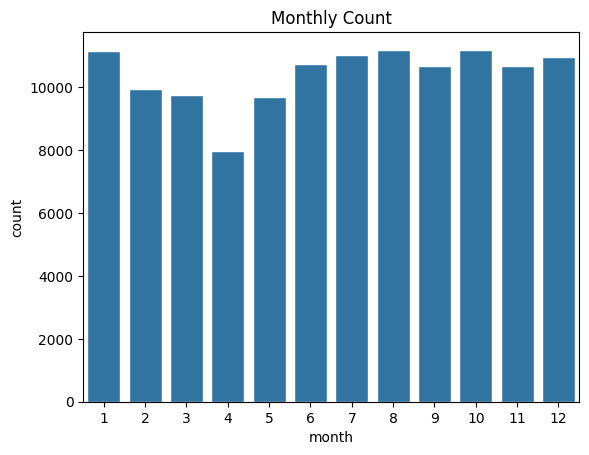

In [ ]:
plt.title("Monthly Count")
sns.set(rc={'figure.figsize':(20,9)})
ax = sns.countplot(data = df, x = 'month')
plt.show()

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='month_year'>

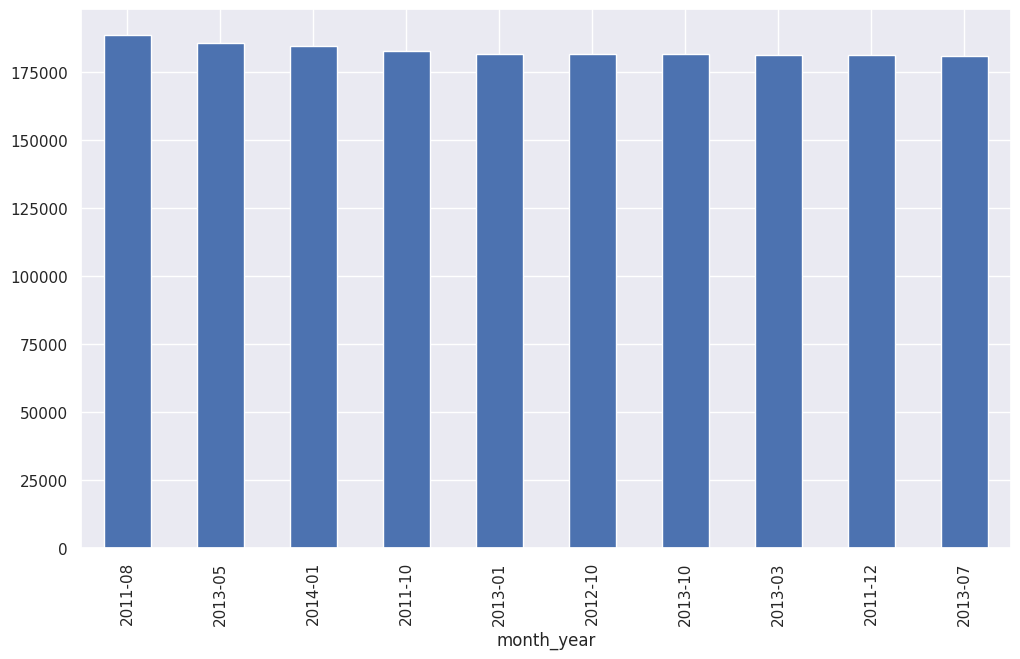

In [ ]:
# top 10 most sales months

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('month_year')['tran_amount'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

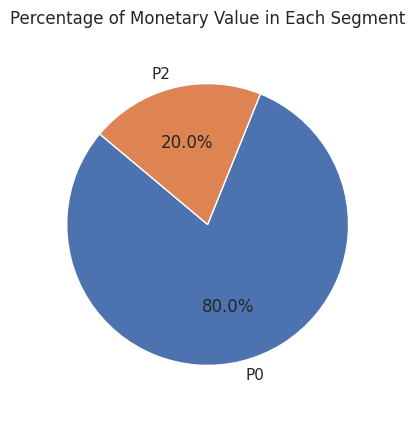

In [ ]:
#Total Sum of monetary distribution by segment

monetarypie = [6498293,1624085]
segment = ['P0','P2']

plt.figure(figsize=(4, 5))
plt.pie(monetarypie, labels=segment, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Monetary Value in Each Segment')
plt.axis('equal')
plt.show()

In [ ]:
df.to_csv('MainData2.csv')

In [ ]:
rfm.to_csv('AddAnalysis.csv')

**Thankyou**